In [9]:
pip install mplfinance

     |████████████████████████████████| 75 kB 348 kB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [24]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import pandas as pd

In [65]:
btcusdt_data_resampled = pd.read_csv('btcusdt_data_resampled.csv')
ethusdt_data_resampled = pd.read_csv('ethusdt_data_resampled.csv')

In [41]:
ethusdt_data_resampled

,date,open,high,low,close,volume,quote_volumn,number_of_trades,taker_buy_volume,taker_buy_quote_volume,price_diff,price_change_percentage
0,2024-05-29,3764.26,3792.99,3742.59,3767.43,63980.2511,2.409220e+08,206627,34830.9766,1.311730e+08,3.17,0.084213
1,2024-05-30,3767.44,3825.35,3702.58,3747.91,277034.2894,1.042146e+09,765716,135950.1498,5.115167e+08,-19.53,-0.518389
2,2024-05-31,3747.90,3849.94,3723.75,3762.29,273406.7660,1.032174e+09,680329,136551.9833,5.155771e+08,14.39,0.383948
3,2024-06-01,3762.29,3833.30,3752.67,3815.82,132687.2006,5.035006e+08,399377,70367.6098,2.670686e+08,53.53,1.422804
4,2024-06-02,3815.82,3838.59,3752.62,3780.71,193941.5897,7.361858e+08,532249,97699.0099,3.708502e+08,-35.11,-0.920117


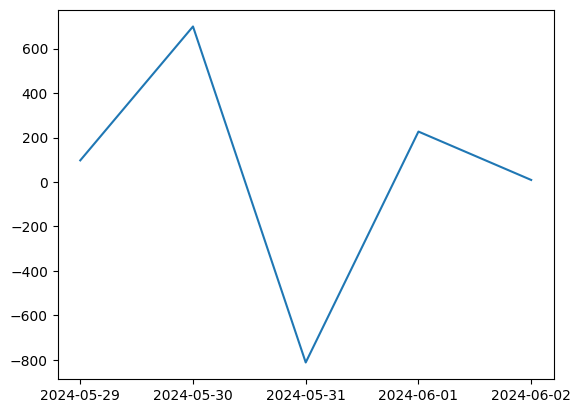

In [12]:
plt.plot(btcusdt_data_resampled['date'], btcusdt_data_resampled['price_diff']);

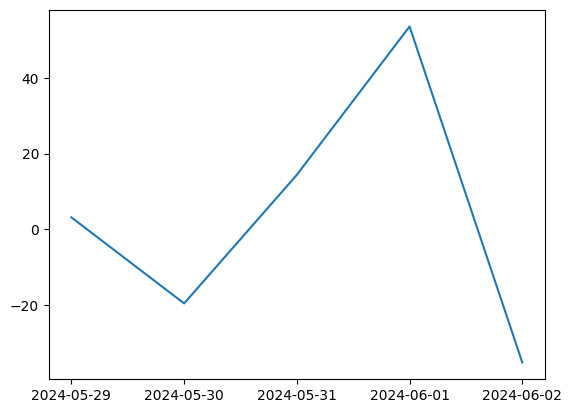

In [13]:
plt.plot(ethusdt_data_resampled['date'], ethusdt_data_resampled['price_diff']);

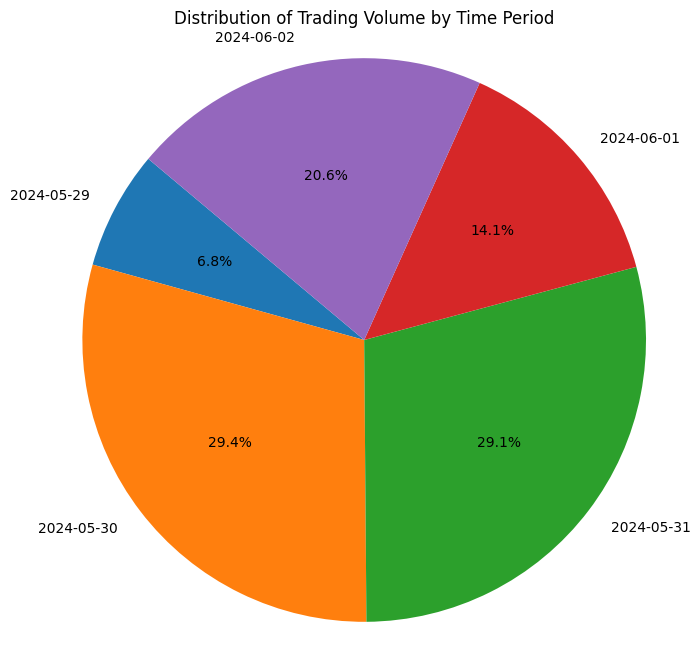

In [37]:
# Calculate the total trading volume for each time period
total_volume_per_period = ethusdt_data_resampled.groupby('date')['volume'].sum()

# Plot a pie chart of the total trading volume
plt.figure(figsize=(8, 8))
plt.pie(total_volume_per_period, labels=total_volume_per_period.index, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Distribution of Trading Volume by Time Period')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal');

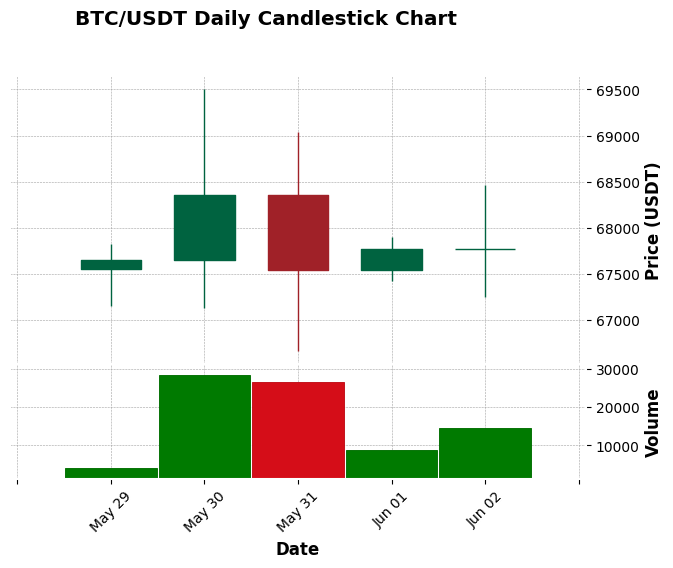

In [36]:
# Plot candlestick chart
btcusdt_data_resampled['date'] = pd.to_datetime(btcusdt_data_resampled['date'])

# Set the 'date' column as the index
btcusdt_data_resampled.set_index('date', inplace=True)

# Plot the candlestick chart
mpf.plot(btcusdt_data_resampled, type='candle', style='charles', 
         title='BTC/USDT Daily Candlestick Chart', 
         ylabel='Price (USDT)', 
         ylabel_lower='Volume',
         xlabel='Date',
         volume=True)

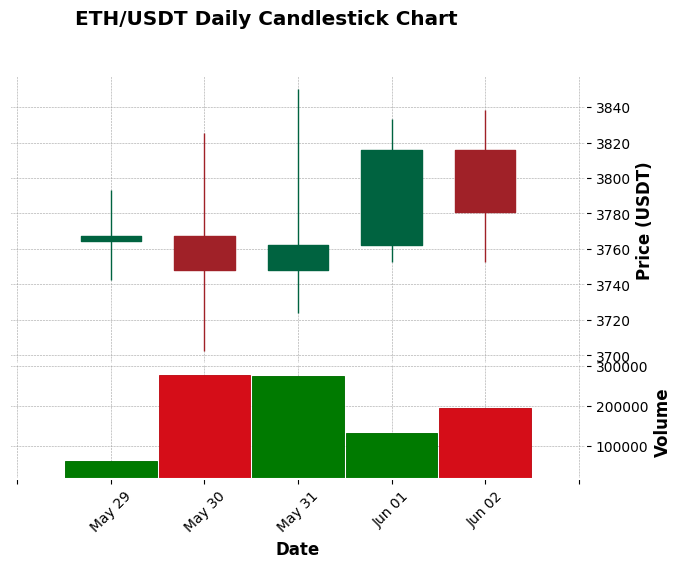

In [43]:
# Plot candlestick chart
ethusdt_data_resampled['date'] = pd.to_datetime(ethusdt_data_resampled['date'])

# Set the 'date' column as the index
ethusdt_data_resampled.set_index('date', inplace=True)

# Plot the candlestick chart
mpf.plot(ethusdt_data_resampled, type='candle', style='charles', 
         title='ETH/USDT Daily Candlestick Chart', 
         ylabel='Price (USDT)', 
         ylabel_lower='Volume',
         xlabel='Date',
         volume=True)

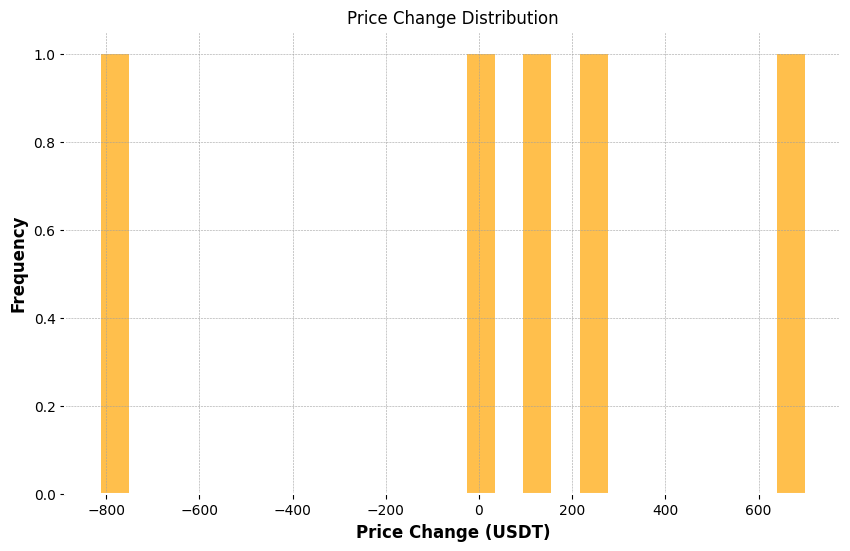

In [53]:
# Plot price change distribution
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(btcusdt_data_resampled['price_diff'], bins=25, color='orange', alpha=0.7)
ax.set_title('Price Change Distribution')
ax.set_xlabel('Price Change (USDT)')
ax.set_ylabel('Frequency')
plt.grid(True)
plt.show()

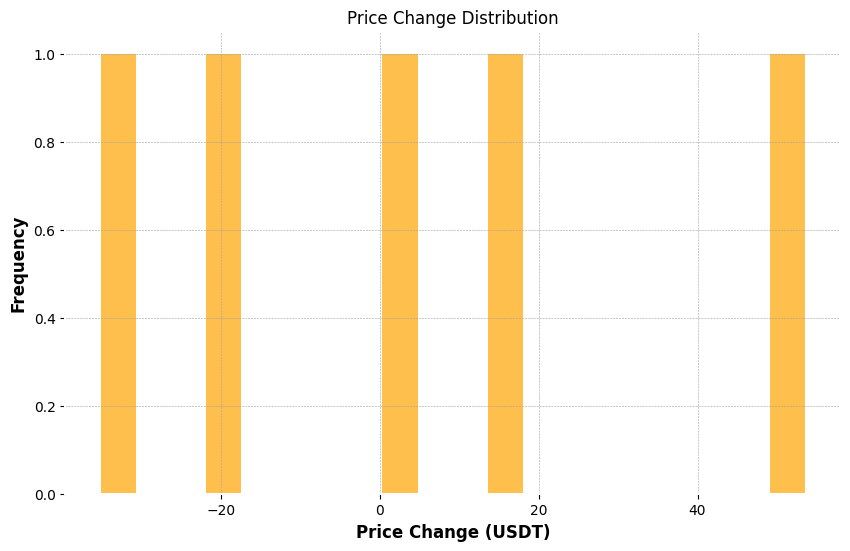

In [49]:
# Plot price change distribution
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(ethusdt_data_resampled['price_diff'], bins=20, color='orange', alpha=0.7)
ax.set_title('Price Change Distribution')
ax.set_xlabel('Price Change (USDT)')
ax.set_ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot candlestick chart with volume as line plot


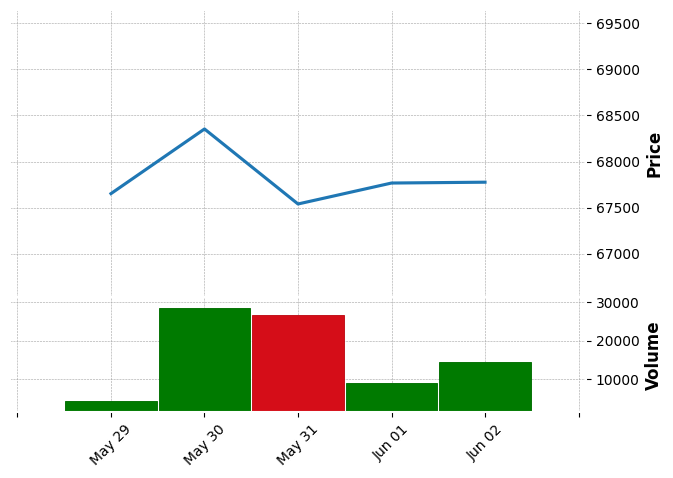

In [54]:
btcusdt_data_resampled['date'] = pd.to_datetime(btcusdt_data_resampled['date'])  # Convert 'open_time' column to datetime
btcusdt_data_resampled.set_index('date', inplace=True)

# Plot candlestick chart with volume as line plot
mpf.plot(btcusdt_data_resampled, type='line', style='charles', volume=True)

# Show the plot
plt.show()

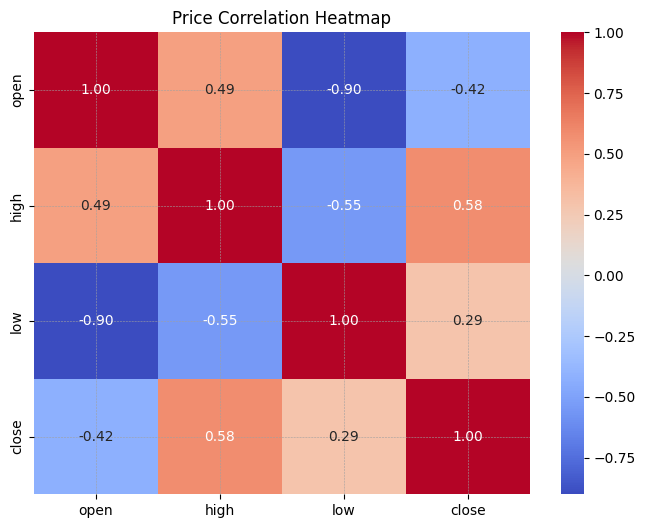

In [67]:
import seaborn as sns

# Generate correlation matrix
corr = btcusdt_data_resampled[['open', 'high', 'low', 'close']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Price Correlation Heatmap')
plt.show()